<a href="https://colab.research.google.com/github/Didier06/IA_licence_pro_chimie/blob/main/random_forest_aromes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌸 Intelligence Artificielle & Chimie
## Classification de molécules aromatiques utilisées en parfumerie
Ce notebook illustre comment l'IA peut aider à classer des molécules odorantes selon leur famille olfactive (florale, fruitée, épicée...).


In [55]:
!pip install rdkit pandas scikit-learn matplotlib


In [56]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [57]:
data = [
    {"name": "Limonene", "smiles": "CC1=CCC(CC1)C(=C)C", "family": "Citrus"},
    {"name": "Citral", "smiles": "CC(C)=CCC=C(C)C=O", "family": "Citrus"},
    {"name": "β-Pinene", "smiles": "CC1=CCC2CC1C2C", "family": "Citrus"},
    {"name": "Linalool", "smiles": "CC(C)=CC=C(CO)COC", "family": "Floral"},
    {"name": "Geraniol", "smiles": "CC(C)=CCCC(C)=CCO", "family": "Floral"},
    {"name": "Citronellol", "smiles": "CC(C)=CCCC(C)CCO", "family": "Floral"},
    {"name": "Phenylethyl alcohol", "smiles": "C1=CC=CC=C1CCO", "family": "Floral"},
    {"name": "Eugenol", "smiles": "CC=C(CC1=CC=C(O)C=C1)OC", "family": "Spicy"},
    {"name": "Cinnamaldehyde", "smiles": "C1=CC=C(C=C1)C=CC=O", "family": "Spicy"},
    {"name": "Anethole", "smiles": "C=CC1=CC=C(C=C1)OC", "family": "Spicy"},
    {"name": "Vanillin", "smiles": "COC1=CC(=CC=C1O)C=O", "family": "Sweet"},
    {"name": "Coumarin", "smiles": "C1=CC=C2C(=O)OC=CC2=C1", "family": "Sweet"},
    {"name": "Benzyl acetate", "smiles": "CC(=O)OCC1=CC=CC=C1", "family": "Fruity"},
    {"name": "Isoamyl acetate", "smiles": "CC(C)CCOC(=O)C", "family": "Fruity"},
    {"name": "Menthol", "smiles": "CC(C)C1CCC(C)CC1O", "family": "Fresh"},
    {"name": "Eucalyptol", "smiles": "CC1CCC2C(C1)CCC2O", "family": "Fresh"},
    {"name": "Camphor", "smiles": "CC1(C2CCC1(CO2)C)C", "family": "Fresh"},
]

df = pd.DataFrame(data)
df.head()



,name,smiles,family
0,Limonene,CC1=CCC(CC1)C(=C)C,Citrus
1,Citral,CC(C)=CCC=C(C)C=O,Citrus
2,β-Pinene,CC1=CCC2CC1C2C,Citrus
3,Linalool,CC(C)=CC=C(CO)COC,Floral
4,Geraniol,CC(C)=CCCC(C)=CCO,Floral


Dessins des molécules

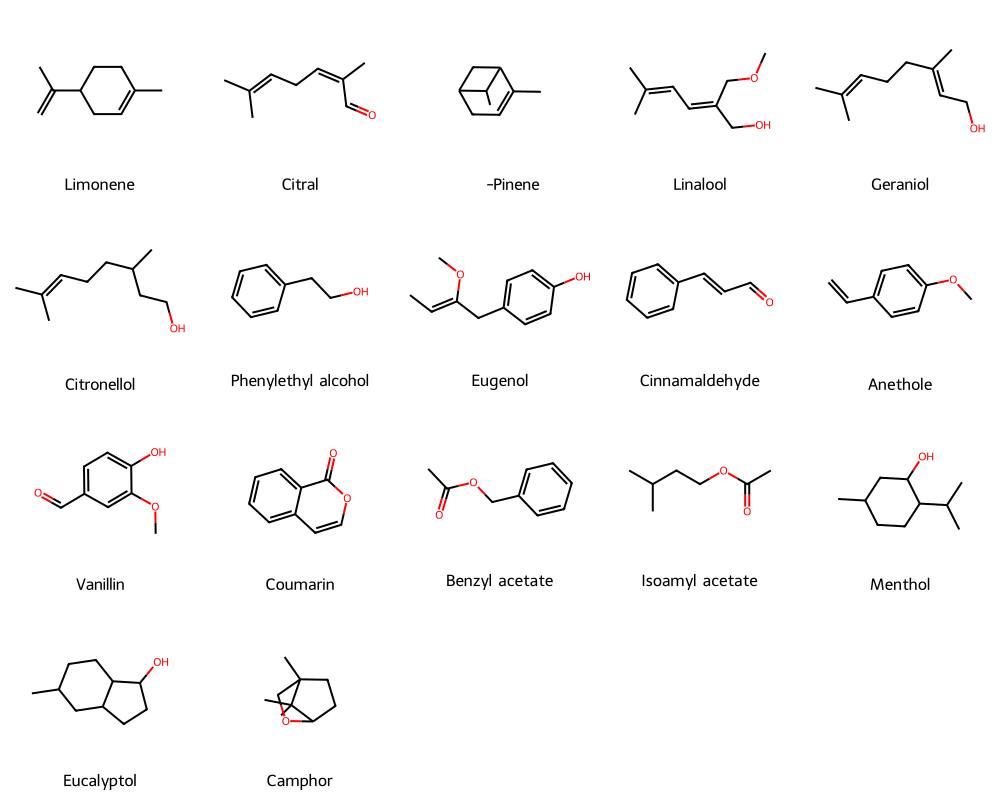

In [58]:
mols = [Chem.MolFromSmiles(smi) for smi in df["smiles"]]
Draw.MolsToGridImage(mols, molsPerRow=5, legends=list(df["name"]))


## Descripteurs moléculaires

In [59]:
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return {
        "MolWt": Descriptors.MolWt(mol),
        "MolLogP": Descriptors.MolLogP(mol),
        "NumAromaticRings": Descriptors.NumAromaticRings(mol),
        "TPSA": Descriptors.TPSA(mol),
        "NumRotatableBonds": Descriptors.NumRotatableBonds(mol)
    }

desc = df["smiles"].apply(compute_descriptors)
desc_df = pd.DataFrame(list(desc))
df = pd.concat([df, desc_df], axis=1)
df.head()



,name,smiles,family,MolWt,MolLogP,NumAromaticRings,TPSA,NumRotatableBonds
0,Limonene,CC1=CCC(CC1)C(=C)C,Citrus,136.238,3.3089,0,0.00,1
1,Citral,CC(C)=CCC=C(C)C=O,Citrus,138.210,2.4879,0,17.07,3
2,β-Pinene,CC1=CCC2CC1C2C,Citrus,122.211,2.6086,0,0.00,0
3,Linalool,CC(C)=CC=C(CO)COC,Floral,156.225,1.5177,0,29.46,4
4,Geraniol,CC(C)=CCCC(C)=CCO,Floral,154.253,2.6714,0,20.23,4


Entrainement du modèle IA

In [60]:
X = df[["MolWt", "MolLogP", "NumAromaticRings", "TPSA", "NumRotatableBonds"]]
y = df["family"]

# stratify → équilibre des familles dans train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("🎯 Accuracy :", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nRapport de classification :\n", classification_report(y_test, y_pred, zero_division=0))


🎯 Accuracy : 50.0 %

Rapport de classification :
               precision    recall  f1-score   support

      Citrus       0.50      1.00      0.67         1
      Floral       0.50      1.00      0.67         1
       Fresh       0.00      0.00      0.00         1
      Fruity       0.00      0.00      0.00         1
       Spicy       0.50      1.00      0.67         1
       Sweet       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



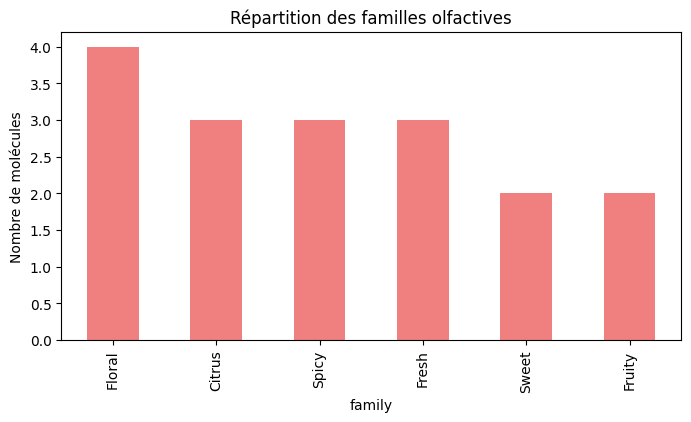

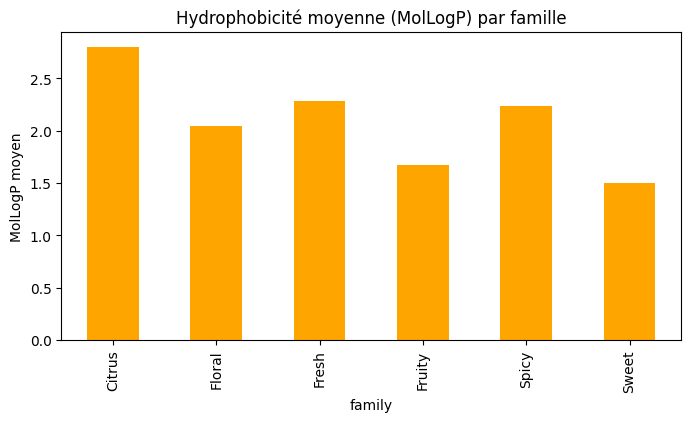

In [61]:
plt.figure(figsize=(8,4))
df["family"].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Répartition des familles olfactives")
plt.ylabel("Nombre de molécules")
plt.show()

plt.figure(figsize=(8,4))
df.groupby("family")["MolLogP"].mean().plot(kind='bar', color='orange')
plt.title("Hydrophobicité moyenne (MolLogP) par famille")
plt.ylabel("MolLogP moyen")
plt.show()


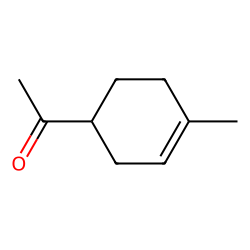

In [62]:
# Exemple : Carvone (odeur mentholée)
test_molecule = "CC1=CCC(CC1)C(=O)C"
mol = Chem.MolFromSmiles(test_molecule)
Draw.MolToImage(mol, size=(250,250))


In [63]:
desc_test = compute_descriptors(test_molecule)
X_new = pd.DataFrame([desc_test])
prediction = model.predict(X_new)[0]
print(f"🔮 Famille olfactive prédite : {prediction}")


🔮 Famille olfactive prédite : Fresh


Exemples de molécules à tester

| Nom de la molécule     | Odeur dominante  | Famille attendue | SMILES                                                         |
| ---------------------- | ---------------- | ---------------- | -------------------------------------------------------------- |
| **Musk ketone**        | Musquée, poudrée | Sweet / Floral   | `CC(C)(C1=CC=C(C=C1)[N+](=O)[O-])C(=O)C2=CC=CC=C2[N+](=O)[O-]` |
| **Benzyl alcohol**     | Douce, fleurie   | Floral / Sweet   | `C1=CC=C(C=C1)CO`                                              |
| **Isoeugenol**         | Épicée, vanillée | Spicy / Sweet    | `CC=C(COC1=CC=CC=C1O)C`                                        |
| **Hexyl acetate**      | Pomme, poire     | Fruity           | `CCCCCCOC(=O)C`                                                |
| **Citronellal**        | Citronné, frais  | Citrus / Fresh   | `CC(C)=CCCC(C)C=O`                                             |
| **Gamma-decalactone**  | Pêche, abricot   | Fruity / Sweet   | `CCCCCCCC1CC(=O)OC1`                                           |
| **Anisaldehyde**       | Anisé, doux      | Sweet            | `COC1=CC=CC=C1C=O`                                             |
| **Menthone**           | Menthe douce     | Fresh            | `CC(C)C1CCC(=O)C(C)C1`                                         |
| **Phenylacetaldehyde** | Miel, fleur      | Floral           | `C1=CC=CC=C1CC=O`                                              |
| **Lyral**              | Floral, muguet   | Floral           | `CC(C)=CCC1=C(C=O)CCC1=O`                                      |


In [64]:
# Exemple : gamma-decalactone (odeur de pêche)
test_molecule = "CCCCCCCC1CC(=O)OC1"
mol = Chem.MolFromSmiles(test_molecule)
Draw.MolToImage(mol, size=(250,250))

desc_test = compute_descriptors(test_molecule)
X_new = pd.DataFrame([desc_test])
prediction = model.predict(X_new)[0]
print(f"🔮 Famille olfactive prédite : {prediction}")


🔮 Famille olfactive prédite : Floral


💡 Saisis le code SMILES d'une molécule (ex: CCCCCCC1CC(=O)OC1 pour la gamma-decalactone)

👉 Entrez un SMILES à tester : CCCCCCOC(=O)C


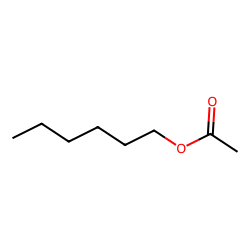

MolWt,MolLogP,NumAromaticRings,TPSA,NumRotatableBonds
144.214,2.1298,0,26.3,5


🔮 Famille olfactive prédite : Floral


In [65]:
# 🌿 Test interactif : prédire la famille olfactive d'une molécule saisie par l'utilisateur

from IPython.display import display, HTML

print("💡 Saisis le code SMILES d'une molécule (ex: CCCCCCC1CC(=O)OC1 pour la gamma-decalactone)\n")
smiles_input = input("👉 Entrez un SMILES à tester : ").strip()

try:
    mol = Chem.MolFromSmiles(smiles_input)
    if mol is None:
        print("⚠️ SMILES invalide ! Vérifiez la syntaxe (copiez depuis PubChem par exemple).")
    else:
        # Affichage de la molécule
        display(Draw.MolToImage(mol, size=(250,250)))

        # Calcul descripteurs
        desc_test = compute_descriptors(smiles_input)
        X_new = pd.DataFrame([desc_test])

        # Affichage des descripteurs calculés
        display(HTML(X_new.to_html(index=False)))

        # Prédiction IA
        prediction = model.predict(X_new)[0]
        print(f"🔮 Famille olfactive prédite : {prediction}")

except Exception as e:
    print("🚫 Erreur lors du traitement :", e)
